### 5 Crossfold Validation for Optimized 3-layer Model
##### 80:20 split for each crossfold validation step

In [1]:
import sys
sys.path.append('..')

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from core.getdata import *
from core.dataset import *
from core.network import *
from core.trainer import *
from core.visualization import *

from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

In [4]:
ligands = ["TNF", "R84", "PIC", "P3K", "FLA", "CpG", "FSL", "LPS", "UST"]
polarization = ["", "ib", "ig", "i0", "i3", "i4"]
replicas, size = 2, 1288

In [5]:
load_dir = '../models/cfv/'
save_dir = '../models/cfv/'
save_name = 'omkfcv'

In [6]:
#model parameters
input_size = 1 
hidden_sizes = 98
output_size = 9
num_layers = 3

#training parameters
n_epochs = 80
batch_size = 65
learning_rate = 1e-3
k = 5

#device
torch.cuda.is_available()
device = torch.device("cuda:0")

### Empty Model for CV
* only need to execute this cell once

In [7]:
net = LSTM(input_size, hidden_sizes, output_size, num_layers=num_layers, device=device)
net.train()
model = LSTMTrainer(model=net, device=device)

In [8]:
model.save('../models/' + 'empty.pth')

### 5F-CV 

In [9]:
data1 = DatasetPolar(ligands, polarization, replicas, size)

In [10]:
net1 = LSTM(input_size, hidden_sizes, output_size, num_layers=num_layers, device=device)
net1.train()

LSTM(
  (lstm): LSTM(1, 98, num_layers=3, batch_first=True)
  (fc1): Linear(in_features=98, out_features=9, bias=True)
)

In [11]:
model1 = LSTMTrainer(model=net1, device=device)

In [12]:
model1.kfcv(data1, k, save_name, batch_size=batch_size, n_epochs=n_epochs)

  1%|█                                                                                  | 1/80 [00:11<15:12, 11.55s/it]

Epoch 001: | Training Loss: 2.1568550679171197 | Validation Loss: 2.1747698616758684


  2%|██                                                                                 | 2/80 [00:22<14:40, 11.29s/it]

Epoch 002: | Training Loss: 2.176373270627494 | Validation Loss: 2.1735970483762084


  4%|███                                                                                | 3/80 [00:33<14:20, 11.17s/it]

Epoch 003: | Training Loss: 2.172086878636173 | Validation Loss: 2.1102977952110433


  5%|████▏                                                                              | 4/80 [00:44<13:49, 10.92s/it]

Epoch 004: | Training Loss: 2.1016000322649413 | Validation Loss: 2.102937154680769


  6%|█████▏                                                                             | 5/80 [00:55<13:36, 10.88s/it]

Epoch 005: | Training Loss: 2.100718326518469 | Validation Loss: 2.100164014045323


  8%|██████▏                                                                            | 6/80 [01:07<13:56, 11.31s/it]

Epoch 006: | Training Loss: 2.135769767321159 | Validation Loss: 2.083258802645674


  9%|███████▎                                                                           | 7/80 [01:19<14:13, 11.69s/it]

Epoch 007: | Training Loss: 2.078070460078872 | Validation Loss: 2.04083689518064


 10%|████████▎                                                                          | 8/80 [01:31<14:11, 11.83s/it]

Epoch 008: | Training Loss: 1.9459529088757863 | Validation Loss: 1.8488215536714714


 11%|█████████▎                                                                         | 9/80 [01:45<14:45, 12.48s/it]

Epoch 009: | Training Loss: 1.8347019330363408 | Validation Loss: 1.789236346137858


 12%|██████████▎                                                                       | 10/80 [02:00<15:14, 13.06s/it]

Epoch 010: | Training Loss: 1.7448931301587096 | Validation Loss: 1.7216401584794587


 14%|███████████▎                                                                      | 11/80 [02:13<15:08, 13.17s/it]

Epoch 011: | Training Loss: 1.6834067366669112 | Validation Loss: 1.6808065070170108


 15%|████████████▎                                                                     | 12/80 [02:27<15:03, 13.29s/it]

Epoch 012: | Training Loss: 1.6407631705297487 | Validation Loss: 1.617082456004954


 16%|█████████████▎                                                                    | 13/80 [02:41<15:11, 13.60s/it]

Epoch 013: | Training Loss: 1.5771323058092706 | Validation Loss: 1.5560160607935112


 18%|██████████████▎                                                                   | 14/80 [02:55<15:09, 13.79s/it]

Epoch 014: | Training Loss: 1.5194417784147174 | Validation Loss: 1.5074504535888957


 19%|███████████████▍                                                                  | 15/80 [03:09<14:57, 13.81s/it]

Epoch 015: | Training Loss: 1.4665247749223886 | Validation Loss: 1.466344889079299


 20%|████████████████▍                                                                 | 16/80 [03:23<14:48, 13.88s/it]

Epoch 016: | Training Loss: 1.414822738722106 | Validation Loss: 1.403357724441546


 21%|█████████████████▍                                                                | 17/80 [03:38<14:49, 14.12s/it]

Epoch 017: | Training Loss: 1.368658623405706 | Validation Loss: 1.3739322808301337


 22%|██████████████████▍                                                               | 18/80 [03:51<14:28, 14.01s/it]

Epoch 018: | Training Loss: 1.3288414869631562 | Validation Loss: 1.3332941381730765


 24%|███████████████████▍                                                              | 19/80 [04:05<14:00, 13.78s/it]

Epoch 019: | Training Loss: 1.291693497205449 | Validation Loss: 1.322713151713398


 25%|████████████████████▌                                                             | 20/80 [04:18<13:47, 13.79s/it]

Epoch 020: | Training Loss: 1.2614416922225016 | Validation Loss: 1.279935143818365


 26%|█████████████████████▌                                                            | 21/80 [04:32<13:31, 13.76s/it]

Epoch 021: | Training Loss: 1.2370600837552659 | Validation Loss: 1.248782764249873


 28%|██████████████████████▌                                                           | 22/80 [04:44<12:40, 13.12s/it]

Epoch 022: | Training Loss: 1.2130814791422024 | Validation Loss: 1.2503677417184704


 29%|███████████████████████▌                                                          | 23/80 [04:55<11:56, 12.56s/it]

Epoch 023: | Training Loss: 1.1819844940833957 | Validation Loss: 1.2248747173313783


 30%|████████████████████████▌                                                         | 24/80 [05:08<11:45, 12.61s/it]

Epoch 024: | Training Loss: 1.1485226128563704 | Validation Loss: 1.2082308213287425


 31%|█████████████████████████▋                                                        | 25/80 [05:20<11:19, 12.35s/it]

Epoch 025: | Training Loss: 1.1234876707753287 | Validation Loss: 1.1938139219707418


 32%|██████████████████████████▋                                                       | 26/80 [05:35<12:00, 13.34s/it]

Epoch 026: | Training Loss: 1.099010198333553 | Validation Loss: 1.158354023071093


 34%|███████████████████████████▋                                                      | 27/80 [05:50<12:17, 13.91s/it]

Epoch 027: | Training Loss: 1.0708415780529799 | Validation Loss: 1.1413761926031558


 35%|████████████████████████████▋                                                     | 28/80 [06:07<12:46, 14.74s/it]

Epoch 028: | Training Loss: 1.0420347083116246 | Validation Loss: 1.1372272185633117


 36%|█████████████████████████████▋                                                    | 29/80 [06:24<13:11, 15.51s/it]

Epoch 029: | Training Loss: 1.0142072789440646 | Validation Loss: 1.1154336940462344


 38%|██████████████████████████████▊                                                   | 30/80 [06:42<13:32, 16.25s/it]

Epoch 030: | Training Loss: 0.9843590132822501 | Validation Loss: 1.0971417137395556


 39%|███████████████████████████████▊                                                  | 31/80 [07:00<13:32, 16.58s/it]

Epoch 031: | Training Loss: 0.957256194030013 | Validation Loss: 1.0648791361077923


 40%|████████████████████████████████▊                                                 | 32/80 [07:18<13:34, 16.97s/it]

Epoch 032: | Training Loss: 0.927445726834725 | Validation Loss: 1.0843506842573112


 41%|█████████████████████████████████▊                                                | 33/80 [07:36<13:33, 17.30s/it]

Epoch 033: | Training Loss: 0.8968882170096736 | Validation Loss: 1.0329524729853479


 42%|██████████████████████████████████▊                                               | 34/80 [07:53<13:11, 17.20s/it]

Epoch 034: | Training Loss: 0.8687681244842917 | Validation Loss: 1.0332360663146616


 44%|███████████████████████████████████▉                                              | 35/80 [08:09<12:39, 16.88s/it]

Epoch 035: | Training Loss: 0.8603523408419618 | Validation Loss: 1.0427283235242433


 45%|████████████████████████████████████▉                                             | 36/80 [08:23<11:49, 16.12s/it]

Epoch 036: | Training Loss: 0.8185581915846495 | Validation Loss: 1.0022292131575468


 46%|█████████████████████████████████████▉                                            | 37/80 [08:40<11:37, 16.22s/it]

Epoch 037: | Training Loss: 0.788013488994302 | Validation Loss: 0.9924238828298088


 48%|██████████████████████████████████████▉                                           | 38/80 [08:57<11:41, 16.70s/it]

Epoch 038: | Training Loss: 0.7616268524499697 | Validation Loss: 0.9898753656405155


 49%|███████████████████████████████████████▉                                          | 39/80 [09:12<11:01, 16.13s/it]

Epoch 039: | Training Loss: 0.7378988103749596 | Validation Loss: 0.9867527649224361


 50%|█████████████████████████████████████████                                         | 40/80 [09:29<10:49, 16.23s/it]

Epoch 040: | Training Loss: 0.7356912338427294 | Validation Loss: 0.9528183076426248


 51%|██████████████████████████████████████████                                        | 41/80 [09:44<10:19, 15.90s/it]

Epoch 041: | Training Loss: 0.6886726574641522 | Validation Loss: 1.1172051321123249


 52%|███████████████████████████████████████████                                       | 42/80 [09:58<09:49, 15.52s/it]

Epoch 042: | Training Loss: 0.6748397934520356 | Validation Loss: 0.9217419785873913


 54%|████████████████████████████████████████████                                      | 43/80 [10:17<10:03, 16.30s/it]

Epoch 043: | Training Loss: 0.6898391593212836 | Validation Loss: 0.8988865335411


 55%|█████████████████████████████████████████████                                     | 44/80 [10:36<10:19, 17.20s/it]

Epoch 044: | Training Loss: 0.6217962264596859 | Validation Loss: 0.9041457173423232


 56%|██████████████████████████████████████████████▏                                   | 45/80 [10:52<09:46, 16.77s/it]

Epoch 045: | Training Loss: 0.6021116199755223 | Validation Loss: 0.9044441004222799


 57%|███████████████████████████████████████████████▏                                  | 46/80 [11:09<09:38, 17.02s/it]

Epoch 046: | Training Loss: 0.579128582517956 | Validation Loss: 0.9099469374273425


 59%|████████████████████████████████████████████████▏                                 | 47/80 [11:23<08:47, 15.98s/it]

Epoch 047: | Training Loss: 0.573297678031654 | Validation Loss: 0.8853592542565871


 60%|█████████████████████████████████████████████████▏                                | 48/80 [11:35<07:57, 14.91s/it]

Epoch 048: | Training Loss: 0.5464405221081226 | Validation Loss: 0.8955615456694754


 61%|██████████████████████████████████████████████████▏                               | 49/80 [11:47<07:15, 14.03s/it]

Epoch 049: | Training Loss: 0.5190376625962068 | Validation Loss: 0.8703160189858107


 62%|███████████████████████████████████████████████████▎                              | 50/80 [12:04<07:22, 14.76s/it]

Epoch 050: | Training Loss: 0.5404701048038273 | Validation Loss: 0.8630580897921714


 64%|████████████████████████████████████████████████████▎                             | 51/80 [12:20<07:22, 15.27s/it]

Epoch 051: | Training Loss: 0.5038948261013655 | Validation Loss: 0.8761257312008154


 65%|█████████████████████████████████████████████████████▎                            | 52/80 [12:37<07:21, 15.78s/it]

Epoch 052: | Training Loss: 0.47449073353869337 | Validation Loss: 0.849527438667333


 66%|██████████████████████████████████████████████████████▎                           | 53/80 [12:54<07:13, 16.05s/it]

Epoch 053: | Training Loss: 0.4674750024574661 | Validation Loss: 0.8736344653869343


 68%|███████████████████████████████████████████████████████▎                          | 54/80 [13:11<07:05, 16.35s/it]

Epoch 054: | Training Loss: 0.45303590891656476 | Validation Loss: 0.8701829815579352


 69%|████████████████████████████████████████████████████████▍                         | 55/80 [13:26<06:37, 15.89s/it]

Epoch 055: | Training Loss: 0.458849467772329 | Validation Loss: 0.8590198136935724


 70%|█████████████████████████████████████████████████████████▍                        | 56/80 [13:38<05:54, 14.77s/it]

Epoch 056: | Training Loss: 0.4347796821705649 | Validation Loss: 0.8685399814743862


 71%|██████████████████████████████████████████████████████████▍                       | 57/80 [13:55<05:54, 15.43s/it]

Epoch 057: | Training Loss: 0.42414804083234237 | Validation Loss: 0.838551571853807


 72%|███████████████████████████████████████████████████████████▍                      | 58/80 [14:13<05:59, 16.33s/it]

Epoch 058: | Training Loss: 0.40030627783004924 | Validation Loss: 0.8267466549839929


 74%|████████████████████████████████████████████████████████████▍                     | 59/80 [14:29<05:37, 16.07s/it]

Epoch 059: | Training Loss: 0.3969288317260341 | Validation Loss: 0.8262459137172342


 75%|█████████████████████████████████████████████████████████████▌                    | 60/80 [14:48<05:40, 17.05s/it]

Epoch 060: | Training Loss: 0.39738522003465726 | Validation Loss: 0.8422629767767736


 76%|██████████████████████████████████████████████████████████████▌                   | 61/80 [15:05<05:21, 16.91s/it]

Epoch 061: | Training Loss: 0.3707728337705414 | Validation Loss: 0.8027741723807058


 78%|███████████████████████████████████████████████████████████████▌                  | 62/80 [15:20<04:57, 16.55s/it]

Epoch 062: | Training Loss: 0.3512701495315566 | Validation Loss: 0.8862469317478554


 79%|████████████████████████████████████████████████████████████████▌                 | 63/80 [15:37<04:40, 16.48s/it]

Epoch 063: | Training Loss: 0.3685733940034548 | Validation Loss: 0.8306476613071477


 80%|█████████████████████████████████████████████████████████████████▌                | 64/80 [15:53<04:23, 16.48s/it]

Epoch 064: | Training Loss: 0.3236876085452805 | Validation Loss: 0.8213916887468267


 81%|██████████████████████████████████████████████████████████████████▋               | 65/80 [16:08<03:59, 15.99s/it]

Epoch 065: | Training Loss: 0.341317150324026 | Validation Loss: 0.8180739844792357


 82%|███████████████████████████████████████████████████████████████████▋              | 66/80 [16:25<03:49, 16.38s/it]

Epoch 066: | Training Loss: 0.33203264936874405 | Validation Loss: 0.8202685585645871


 84%|████████████████████████████████████████████████████████████████████▋             | 67/80 [16:39<03:24, 15.70s/it]

Epoch 067: | Training Loss: 0.31849389980225085 | Validation Loss: 0.8381364390114757


 85%|█████████████████████████████████████████████████████████████████████▋            | 68/80 [16:51<02:53, 14.42s/it]

Epoch 068: | Training Loss: 0.31296622959426906 | Validation Loss: 0.8734198758535296


 86%|██████████████████████████████████████████████████████████████████████▋           | 69/80 [17:02<02:28, 13.54s/it]

Epoch 069: | Training Loss: 0.3012850266559241 | Validation Loss: 0.8094788778608091


 88%|███████████████████████████████████████████████████████████████████████▊          | 70/80 [17:14<02:09, 12.91s/it]

Epoch 070: | Training Loss: 0.2981336450761306 | Validation Loss: 0.8175627696458424


 89%|████████████████████████████████████████████████████████████████████████▊         | 71/80 [17:25<01:53, 12.58s/it]

Epoch 071: | Training Loss: 0.3092043236002465 | Validation Loss: 0.8032094224869648


 90%|█████████████████████████████████████████████████████████████████████████▊        | 72/80 [17:37<01:38, 12.36s/it]

Epoch 072: | Training Loss: 0.2842767917437949 | Validation Loss: 0.8254524612816695


 91%|██████████████████████████████████████████████████████████████████████████▊       | 73/80 [17:49<01:25, 12.19s/it]

Epoch 073: | Training Loss: 0.2881829510051235 | Validation Loss: 0.8040206703905747


 92%|███████████████████████████████████████████████████████████████████████████▊      | 74/80 [18:01<01:12, 12.06s/it]

Epoch 074: | Training Loss: 0.26713160893697047 | Validation Loss: 0.7924687327625596


 94%|████████████████████████████████████████████████████████████████████████████▉     | 75/80 [18:13<00:59, 11.97s/it]

Epoch 075: | Training Loss: 0.26327483178438427 | Validation Loss: 0.8108785964339693


 95%|█████████████████████████████████████████████████████████████████████████████▉    | 76/80 [18:24<00:47, 11.91s/it]

Epoch 076: | Training Loss: 0.2612390533594467 | Validation Loss: 0.8302283280085181


 96%|██████████████████████████████████████████████████████████████████████████████▉   | 77/80 [18:36<00:35, 11.87s/it]

Epoch 077: | Training Loss: 0.2608666403358367 | Validation Loss: 0.8230361043014259


 98%|███████████████████████████████████████████████████████████████████████████████▉  | 78/80 [18:50<00:24, 12.46s/it]

Epoch 078: | Training Loss: 0.24463997513630262 | Validation Loss: 0.8216816239824919


 99%|████████████████████████████████████████████████████████████████████████████████▉ | 79/80 [19:05<00:13, 13.25s/it]

Epoch 079: | Training Loss: 0.2472364450021534 | Validation Loss: 0.7943563703621659


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [19:22<00:00, 14.53s/it]

Epoch 080: | Training Loss: 0.26988868408392525 | Validation Loss: 0.8188699829244168



  1%|█                                                                                  | 1/80 [00:15<20:57, 15.91s/it]

Epoch 001: | Training Loss: 2.102910935600227 | Validation Loss: 2.1046149624842347


  2%|██                                                                                 | 2/80 [00:30<19:49, 15.24s/it]

Epoch 002: | Training Loss: 2.1651566809861458 | Validation Loss: 2.1976848629033454


  4%|███                                                                                | 3/80 [00:46<20:07, 15.68s/it]

Epoch 003: | Training Loss: 2.1974271357616533 | Validation Loss: 2.1970398771428616


  5%|████▏                                                                              | 4/80 [01:03<20:29, 16.18s/it]

Epoch 004: | Training Loss: 2.1968229872601053 | Validation Loss: 2.1979133681716205


  6%|█████▏                                                                             | 5/80 [01:19<20:08, 16.11s/it]

Epoch 005: | Training Loss: 2.1974706858675055 | Validation Loss: 2.197584099858721


  8%|██████▏                                                                            | 6/80 [01:35<19:45, 16.01s/it]

Epoch 006: | Training Loss: 2.1973569980848615 | Validation Loss: 2.1978642996226516


  9%|███████▎                                                                           | 7/80 [01:50<19:02, 15.66s/it]

Epoch 007: | Training Loss: 2.1973880373428916 | Validation Loss: 2.197533355695065


 10%|████████▎                                                                          | 8/80 [02:07<19:25, 16.19s/it]

Epoch 008: | Training Loss: 2.1973362097116276 | Validation Loss: 2.1976400212706806


 11%|█████████▎                                                                         | 9/80 [02:22<18:36, 15.72s/it]

Epoch 009: | Training Loss: 2.1973487592746164 | Validation Loss: 2.1974597144349715


 12%|██████████▎                                                                       | 10/80 [02:38<18:34, 15.93s/it]

Epoch 010: | Training Loss: 2.1973594435464556 | Validation Loss: 2.19742705220374


 14%|███████████▎                                                                      | 11/80 [02:55<18:36, 16.17s/it]

Epoch 011: | Training Loss: 2.197332681339478 | Validation Loss: 2.197453240367854


 15%|████████████▎                                                                     | 12/80 [03:10<17:46, 15.69s/it]

Epoch 012: | Training Loss: 2.197325627658969 | Validation Loss: 2.197544681691678


 16%|█████████████▎                                                                    | 13/80 [03:25<17:13, 15.43s/it]

Epoch 013: | Training Loss: 2.197315046998942 | Validation Loss: 2.1973323175840287


 18%|██████████████▎                                                                   | 14/80 [03:39<16:34, 15.07s/it]

Epoch 014: | Training Loss: 2.194351235004229 | Validation Loss: 2.1990815022281396


 19%|███████████████▍                                                                  | 15/80 [03:52<15:42, 14.50s/it]

Epoch 015: | Training Loss: 2.192198592647214 | Validation Loss: 2.1973800859718677


 20%|████████████████▍                                                                 | 16/80 [04:05<14:59, 14.05s/it]

Epoch 016: | Training Loss: 2.060676025313752 | Validation Loss: 1.9940526942226375


 21%|█████████████████▍                                                                | 17/80 [04:18<14:30, 13.81s/it]

Epoch 017: | Training Loss: 1.9004186545019952 | Validation Loss: 1.8040904658977117


 22%|██████████████████▍                                                               | 18/80 [04:32<14:10, 13.72s/it]

Epoch 018: | Training Loss: 1.7566885623697923 | Validation Loss: 1.6737008986072006


 24%|███████████████████▍                                                              | 19/80 [04:45<13:44, 13.52s/it]

Epoch 019: | Training Loss: 1.6361492631312842 | Validation Loss: 1.5900078087209542


 25%|████████████████████▌                                                             | 20/80 [04:59<13:41, 13.69s/it]

Epoch 020: | Training Loss: 1.564529253918434 | Validation Loss: 1.531537274890971


 26%|█████████████████████▌                                                            | 21/80 [05:12<13:14, 13.47s/it]

Epoch 021: | Training Loss: 1.5061308106529379 | Validation Loss: 1.5019284770867536


 28%|██████████████████████▌                                                           | 22/80 [05:25<12:51, 13.30s/it]

Epoch 022: | Training Loss: 1.452578904612042 | Validation Loss: 1.439120959455722


 29%|███████████████████████▌                                                          | 23/80 [05:38<12:36, 13.27s/it]

Epoch 023: | Training Loss: 1.3986993821981912 | Validation Loss: 1.3851878782299076


 30%|████████████████████████▌                                                         | 24/80 [05:52<12:30, 13.40s/it]

Epoch 024: | Training Loss: 1.3499969065746413 | Validation Loss: 1.347968028527554


 31%|█████████████████████████▋                                                        | 25/80 [06:05<12:21, 13.48s/it]

Epoch 025: | Training Loss: 1.3065559605014658 | Validation Loss: 1.323129312178799


 32%|██████████████████████████▋                                                       | 26/80 [06:19<12:07, 13.48s/it]

Epoch 026: | Training Loss: 1.271376052610228 | Validation Loss: 1.328473959570733


 34%|███████████████████████████▋                                                      | 27/80 [06:33<12:08, 13.74s/it]

Epoch 027: | Training Loss: 1.2357289277922328 | Validation Loss: 1.277286055210595


 35%|████████████████████████████▋                                                     | 28/80 [06:47<11:57, 13.80s/it]

Epoch 028: | Training Loss: 1.268087272401725 | Validation Loss: 1.2390710505369669


 36%|█████████████████████████████▋                                                    | 29/80 [07:01<11:46, 13.85s/it]

Epoch 029: | Training Loss: 1.1758216841616362 | Validation Loss: 1.2314252031740742


 38%|██████████████████████████████▊                                                   | 30/80 [07:14<11:20, 13.61s/it]

Epoch 030: | Training Loss: 1.139305892322108 | Validation Loss: 1.2032328735445148


 39%|███████████████████████████████▊                                                  | 31/80 [07:28<11:05, 13.58s/it]

Epoch 031: | Training Loss: 1.1160920531811 | Validation Loss: 1.1840905569424138


 40%|████████████████████████████████▊                                                 | 32/80 [07:41<10:48, 13.50s/it]

Epoch 032: | Training Loss: 1.0860982994749167 | Validation Loss: 1.1750489481698687


 41%|█████████████████████████████████▊                                                | 33/80 [07:54<10:28, 13.37s/it]

Epoch 033: | Training Loss: 1.0509298441705304 | Validation Loss: 1.1659064958585756


 42%|██████████████████████████████████▊                                               | 34/80 [08:07<10:08, 13.22s/it]

Epoch 034: | Training Loss: 1.0131075133647873 | Validation Loss: 1.1778822374121052


 44%|███████████████████████████████████▉                                              | 35/80 [08:20<09:55, 13.23s/it]

Epoch 035: | Training Loss: 0.9859380183793675 | Validation Loss: 1.1240635310935083


 45%|████████████████████████████████████▉                                             | 36/80 [08:33<09:43, 13.26s/it]

Epoch 036: | Training Loss: 0.9445239183640926 | Validation Loss: 1.0794895898515933


 46%|█████████████████████████████████████▉                                            | 37/80 [08:47<09:29, 13.25s/it]

Epoch 037: | Training Loss: 0.9249100337657973 | Validation Loss: 1.1149024275418753


 48%|██████████████████████████████████████▉                                           | 38/80 [09:01<09:29, 13.55s/it]

Epoch 038: | Training Loss: 0.8850478576583283 | Validation Loss: 1.0506666316607287


 49%|███████████████████████████████████████▉                                          | 39/80 [09:14<09:13, 13.51s/it]

Epoch 039: | Training Loss: 0.8537012025296131 | Validation Loss: 1.0262472863509275


 50%|█████████████████████████████████████████                                         | 40/80 [09:28<08:57, 13.43s/it]

Epoch 040: | Training Loss: 0.8253418376373354 | Validation Loss: 1.0312711891726913


 51%|██████████████████████████████████████████                                        | 41/80 [09:41<08:40, 13.36s/it]

Epoch 041: | Training Loss: 0.7871174012946192 | Validation Loss: 1.0003131859213392


 52%|███████████████████████████████████████████                                       | 42/80 [09:54<08:22, 13.21s/it]

Epoch 042: | Training Loss: 0.7536037337974967 | Validation Loss: 1.0297560936936707


 54%|████████████████████████████████████████████                                      | 43/80 [10:07<08:04, 13.10s/it]

Epoch 043: | Training Loss: 0.7375192674242448 | Validation Loss: 0.9852994691545718


 55%|█████████████████████████████████████████████                                     | 44/80 [10:20<07:53, 13.14s/it]

Epoch 044: | Training Loss: 0.6960170471988548 | Validation Loss: 0.9648775767500155


 56%|██████████████████████████████████████████████▏                                   | 45/80 [10:33<07:37, 13.08s/it]

Epoch 045: | Training Loss: 0.6672174296576843 | Validation Loss: 0.9368961893509482


 57%|███████████████████████████████████████████████▏                                  | 46/80 [10:46<07:28, 13.18s/it]

Epoch 046: | Training Loss: 0.6418463988142593 | Validation Loss: 0.9474512856697368


 59%|████████████████████████████████████████████████▏                                 | 47/80 [10:59<07:15, 13.18s/it]

Epoch 047: | Training Loss: 0.6262617844078585 | Validation Loss: 0.9085242060300346


 60%|█████████████████████████████████████████████████▏                                | 48/80 [11:13<07:06, 13.31s/it]

Epoch 048: | Training Loss: 0.5949819053862696 | Validation Loss: 1.0346573566164925


 61%|██████████████████████████████████████████████████▏                               | 49/80 [11:27<07:03, 13.66s/it]

Epoch 049: | Training Loss: 0.6088233428058502 | Validation Loss: 0.9256893162415406


 62%|███████████████████████████████████████████████████▎                              | 50/80 [11:40<06:44, 13.48s/it]

Epoch 050: | Training Loss: 0.5481824180825012 | Validation Loss: 0.873317907903796


 64%|████████████████████████████████████████████████████▎                             | 51/80 [11:53<06:24, 13.26s/it]

Epoch 051: | Training Loss: 0.5432658416924075 | Validation Loss: 0.9151022105573494


 65%|█████████████████████████████████████████████████████▎                            | 52/80 [12:06<06:10, 13.23s/it]

Epoch 052: | Training Loss: 0.5060523329563787 | Validation Loss: 0.8463759210622199


 66%|██████████████████████████████████████████████████████▎                           | 53/80 [12:20<05:56, 13.22s/it]

Epoch 053: | Training Loss: 0.5190654856405247 | Validation Loss: 0.8714702944053667


 68%|███████████████████████████████████████████████████████▎                          | 54/80 [12:33<05:46, 13.31s/it]

Epoch 054: | Training Loss: 0.4763672899837806 | Validation Loss: 0.8653073636727913


 69%|████████████████████████████████████████████████████████▍                         | 55/80 [12:47<05:39, 13.59s/it]

Epoch 055: | Training Loss: 0.4698445464127532 | Validation Loss: 0.8603466025022702


 70%|█████████████████████████████████████████████████████████▍                        | 56/80 [13:01<05:25, 13.56s/it]

Epoch 056: | Training Loss: 0.4372587775654882 | Validation Loss: 0.8499244753723947


 71%|██████████████████████████████████████████████████████████▍                       | 57/80 [13:15<05:17, 13.79s/it]

Epoch 057: | Training Loss: 0.43360978735732697 | Validation Loss: 0.8319219796457024


 72%|███████████████████████████████████████████████████████████▍                      | 58/80 [13:29<05:02, 13.74s/it]

Epoch 058: | Training Loss: 0.4126670406696117 | Validation Loss: 0.8323656383240334


 74%|████████████████████████████████████████████████████████████▍                     | 59/80 [13:42<04:48, 13.73s/it]

Epoch 059: | Training Loss: 0.41158542487874766 | Validation Loss: 0.8392490765480237


 75%|█████████████████████████████████████████████████████████████▌                    | 60/80 [13:55<04:29, 13.48s/it]

Epoch 060: | Training Loss: 0.38964696070092303 | Validation Loss: 0.8410680071215764


 76%|██████████████████████████████████████████████████████████████▌                   | 61/80 [14:09<04:15, 13.43s/it]

Epoch 061: | Training Loss: 0.370891175694137 | Validation Loss: 0.8059177888888065


 78%|███████████████████████████████████████████████████████████████▌                  | 62/80 [14:22<04:00, 13.38s/it]

Epoch 062: | Training Loss: 0.3624219592382139 | Validation Loss: 0.819081286125094


 79%|████████████████████████████████████████████████████████████████▌                 | 63/80 [14:36<03:48, 13.44s/it]

Epoch 063: | Training Loss: 0.36562628368629474 | Validation Loss: 0.8785053958124089


 80%|█████████████████████████████████████████████████████████████████▌                | 64/80 [14:48<03:32, 13.30s/it]

Epoch 064: | Training Loss: 0.3434515732436258 | Validation Loss: 0.8090478374718506


 81%|██████████████████████████████████████████████████████████████████▋               | 65/80 [15:03<03:23, 13.59s/it]

Epoch 065: | Training Loss: 0.3396952873287357 | Validation Loss: 0.8302358381937598


 82%|███████████████████████████████████████████████████████████████████▋              | 66/80 [15:17<03:13, 13.82s/it]

Epoch 066: | Training Loss: 0.31914918877567366 | Validation Loss: 0.8430905687474759


 84%|████████████████████████████████████████████████████████████████████▋             | 67/80 [15:32<03:01, 13.99s/it]

Epoch 067: | Training Loss: 0.30938222585681163 | Validation Loss: 0.8199450724592833


 85%|█████████████████████████████████████████████████████████████████████▋            | 68/80 [15:45<02:47, 13.98s/it]

Epoch 068: | Training Loss: 0.29566381424317295 | Validation Loss: 0.8566864611946534


 86%|██████████████████████████████████████████████████████████████████████▋           | 69/80 [16:00<02:36, 14.18s/it]

Epoch 069: | Training Loss: 0.298744889716052 | Validation Loss: 0.8039064894769793


 88%|███████████████████████████████████████████████████████████████████████▊          | 70/80 [16:14<02:21, 14.17s/it]

Epoch 070: | Training Loss: 0.2888068173202538 | Validation Loss: 0.8302842124461014


 89%|████████████████████████████████████████████████████████████████████████▊         | 71/80 [16:29<02:07, 14.20s/it]

Epoch 071: | Training Loss: 0.27152672562330404 | Validation Loss: 0.8808046589109385


 90%|█████████████████████████████████████████████████████████████████████████▊        | 72/80 [16:44<01:55, 14.46s/it]

Epoch 072: | Training Loss: 0.2778814663309778 | Validation Loss: 0.8254634281185186


 91%|██████████████████████████████████████████████████████████████████████████▊       | 73/80 [16:58<01:41, 14.50s/it]

Epoch 073: | Training Loss: 0.29036277034711616 | Validation Loss: 0.8291299474016528


 92%|███████████████████████████████████████████████████████████████████████████▊      | 74/80 [17:11<01:24, 14.09s/it]

Epoch 074: | Training Loss: 0.24929170343137094 | Validation Loss: 0.8448620633544209


 94%|████████████████████████████████████████████████████████████████████████████▉     | 75/80 [17:24<01:08, 13.71s/it]

Epoch 075: | Training Loss: 0.24191099602868346 | Validation Loss: 0.9057294326686414


 95%|█████████████████████████████████████████████████████████████████████████████▉    | 76/80 [17:37<00:53, 13.40s/it]

Epoch 076: | Training Loss: 0.284065034623458 | Validation Loss: 0.8640136828767919


 96%|██████████████████████████████████████████████████████████████████████████████▉   | 77/80 [17:50<00:40, 13.43s/it]

Epoch 077: | Training Loss: 0.23720245476742494 | Validation Loss: 0.7844606840582652


 98%|███████████████████████████████████████████████████████████████████████████████▉  | 78/80 [18:04<00:27, 13.56s/it]

Epoch 078: | Training Loss: 0.22067661851505252 | Validation Loss: 0.807394226299268


 99%|████████████████████████████████████████████████████████████████████████████████▉ | 79/80 [18:17<00:13, 13.42s/it]

Epoch 079: | Training Loss: 0.22887020681279702 | Validation Loss: 0.923938567393294


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [18:30<00:00, 13.88s/it]

Epoch 080: | Training Loss: 0.21678858497571724 | Validation Loss: 0.8276393577874264



  1%|█                                                                                  | 1/80 [00:12<16:59, 12.91s/it]

Epoch 001: | Training Loss: 2.123622322890246 | Validation Loss: 2.1945162688460305


  2%|██                                                                                 | 2/80 [00:26<17:16, 13.29s/it]

Epoch 002: | Training Loss: 2.1953320876460207 | Validation Loss: 2.1968718210113383


  4%|███                                                                                | 3/80 [00:39<16:55, 13.19s/it]

Epoch 003: | Training Loss: 2.197128806715814 | Validation Loss: 2.1889503681771108


  5%|████▏                                                                              | 4/80 [00:52<16:34, 13.08s/it]

Epoch 004: | Training Loss: 2.140451119742661 | Validation Loss: 2.0919742500670604


  6%|█████▏                                                                             | 5/80 [01:05<16:25, 13.14s/it]

Epoch 005: | Training Loss: 2.0315698034295413 | Validation Loss: 2.098020993103491


  8%|██████▏                                                                            | 6/80 [01:18<16:16, 13.20s/it]

Epoch 006: | Training Loss: 1.8880452367468414 | Validation Loss: 1.7933128888361922


  9%|███████▎                                                                           | 7/80 [01:31<15:57, 13.12s/it]

Epoch 007: | Training Loss: 1.7325631910673926 | Validation Loss: 1.6846693080162334


 10%|████████▎                                                                          | 8/80 [01:44<15:38, 13.03s/it]

Epoch 008: | Training Loss: 1.6493348621319388 | Validation Loss: 1.6007485545684244


 11%|█████████▎                                                                         | 9/80 [01:57<15:19, 12.96s/it]

Epoch 009: | Training Loss: 1.5890017192218906 | Validation Loss: 1.5581140596175862


 12%|██████████▎                                                                       | 10/80 [02:10<15:16, 13.10s/it]

Epoch 010: | Training Loss: 1.5379813536305293 | Validation Loss: 1.5116566798397313


 14%|███████████▎                                                                      | 11/80 [02:24<15:17, 13.30s/it]

Epoch 011: | Training Loss: 1.4840762322751162 | Validation Loss: 1.4585583271267257


 15%|████████████▎                                                                     | 12/80 [02:37<14:56, 13.19s/it]

Epoch 012: | Training Loss: 1.4241438806056976 | Validation Loss: 1.4021296902237652


 16%|█████████████▎                                                                    | 13/80 [02:50<14:33, 13.03s/it]

Epoch 013: | Training Loss: 1.3736933599287104 | Validation Loss: 1.3624504030307876


 18%|██████████████▎                                                                   | 14/80 [03:03<14:19, 13.03s/it]

Epoch 014: | Training Loss: 1.3257452973695558 | Validation Loss: 1.3355704175534648


 19%|███████████████▍                                                                  | 15/80 [03:16<14:10, 13.08s/it]

Epoch 015: | Training Loss: 1.277047514428045 | Validation Loss: 1.2872638396013563


 20%|████████████████▍                                                                 | 16/80 [03:29<13:55, 13.06s/it]

Epoch 016: | Training Loss: 1.2406578990761365 | Validation Loss: 1.2476108959902112


 21%|█████████████████▍                                                                | 17/80 [03:42<13:47, 13.14s/it]

Epoch 017: | Training Loss: 1.2122408684308283 | Validation Loss: 1.231442594082556


 22%|██████████████████▍                                                               | 18/80 [03:55<13:27, 13.03s/it]

Epoch 018: | Training Loss: 1.1736998605393918 | Validation Loss: 1.221711086892636


 24%|███████████████████▍                                                              | 19/80 [04:08<13:17, 13.07s/it]

Epoch 019: | Training Loss: 1.1450334351474993 | Validation Loss: 1.1763139609421525


 25%|████████████████████▌                                                             | 20/80 [04:22<13:10, 13.18s/it]

Epoch 020: | Training Loss: 1.109062412631846 | Validation Loss: 1.1659213318445971


 26%|█████████████████████▌                                                            | 21/80 [04:35<12:50, 13.05s/it]

Epoch 021: | Training Loss: 1.07917969847951 | Validation Loss: 1.1431877306688611


 28%|██████████████████████▌                                                           | 22/80 [04:47<12:31, 12.96s/it]

Epoch 022: | Training Loss: 1.0418010356827316 | Validation Loss: 1.1275696172335437


 29%|███████████████████████▌                                                          | 23/80 [05:00<12:20, 12.99s/it]

Epoch 023: | Training Loss: 1.011961294042173 | Validation Loss: 1.155845884964845


 30%|████████████████████████▌                                                         | 24/80 [05:13<12:08, 13.01s/it]

Epoch 024: | Training Loss: 0.9722670318088799 | Validation Loss: 1.087032671286681


 31%|█████████████████████████▋                                                        | 25/80 [05:26<11:55, 13.01s/it]

Epoch 025: | Training Loss: 0.9402923671720184 | Validation Loss: 1.0793370434613985


 32%|██████████████████████████▋                                                       | 26/80 [05:39<11:37, 12.92s/it]

Epoch 026: | Training Loss: 0.9028832030212768 | Validation Loss: 1.0480606469595544


 34%|███████████████████████████▋                                                      | 27/80 [05:52<11:23, 12.89s/it]

Epoch 027: | Training Loss: 0.8660317815352823 | Validation Loss: 1.0257391871135926


 35%|████████████████████████████▋                                                     | 28/80 [06:05<11:18, 13.06s/it]

Epoch 028: | Training Loss: 0.8320727204886552 | Validation Loss: 1.020077353604486


 36%|█████████████████████████████▋                                                    | 29/80 [06:19<11:10, 13.15s/it]

Epoch 029: | Training Loss: 0.7973936592167783 | Validation Loss: 0.98072650499433


 38%|██████████████████████████████▊                                                   | 30/80 [06:32<10:53, 13.06s/it]

Epoch 030: | Training Loss: 0.7610245466093036 | Validation Loss: 0.9657566137960024


 39%|███████████████████████████████▊                                                  | 31/80 [06:45<10:39, 13.05s/it]

Epoch 031: | Training Loss: 0.734836620356992 | Validation Loss: 0.9787404205754539


 40%|████████████████████████████████▊                                                 | 32/80 [06:58<10:33, 13.19s/it]

Epoch 032: | Training Loss: 0.7149317705673035 | Validation Loss: 0.9461217904202291


 41%|█████████████████████████████████▊                                                | 33/80 [07:11<10:21, 13.23s/it]

Epoch 033: | Training Loss: 0.6601946427025528 | Validation Loss: 0.9541520356574905


 42%|██████████████████████████████████▊                                               | 34/80 [07:24<10:03, 13.12s/it]

Epoch 034: | Training Loss: 0.6536454414931413 | Validation Loss: 0.8979675758664853


 44%|███████████████████████████████████▉                                              | 35/80 [07:37<09:43, 12.96s/it]

Epoch 035: | Training Loss: 0.6195609070987345 | Validation Loss: 0.8798632684433572


 45%|████████████████████████████████████▉                                             | 36/80 [07:50<09:33, 13.03s/it]

Epoch 036: | Training Loss: 0.5942332685063375 | Validation Loss: 0.8873131932499253


 46%|█████████████████████████████████████▉                                            | 37/80 [08:04<09:37, 13.42s/it]

Epoch 037: | Training Loss: 0.5776830790825537 | Validation Loss: 0.862805421664336


 48%|██████████████████████████████████████▉                                           | 38/80 [08:18<09:25, 13.46s/it]

Epoch 038: | Training Loss: 0.5418701084661428 | Validation Loss: 0.8987939224064907


 49%|███████████████████████████████████████▉                                          | 39/80 [08:31<09:02, 13.23s/it]

Epoch 039: | Training Loss: 0.5135911440598631 | Validation Loss: 0.8419672202005565


 50%|█████████████████████████████████████████                                         | 40/80 [08:44<08:45, 13.13s/it]

Epoch 040: | Training Loss: 0.4992535543218951 | Validation Loss: 0.8690188096783985


 51%|██████████████████████████████████████████                                        | 41/80 [08:58<08:45, 13.48s/it]

Epoch 041: | Training Loss: 0.48511277295857946 | Validation Loss: 0.8859712478713454


 52%|███████████████████████████████████████████                                       | 42/80 [09:11<08:26, 13.32s/it]

Epoch 042: | Training Loss: 0.4740157545866253 | Validation Loss: 0.8815778922811847


 54%|████████████████████████████████████████████                                      | 43/80 [09:24<08:06, 13.15s/it]

Epoch 043: | Training Loss: 0.4418996635337021 | Validation Loss: 0.8408201955189215


 55%|█████████████████████████████████████████████                                     | 44/80 [09:37<07:52, 13.14s/it]

Epoch 044: | Training Loss: 0.43357002261643096 | Validation Loss: 0.818268393383962


 56%|██████████████████████████████████████████████▏                                   | 45/80 [09:50<07:44, 13.26s/it]

Epoch 045: | Training Loss: 0.42906939582986253 | Validation Loss: 0.8477756726407559


 57%|███████████████████████████████████████████████▏                                  | 46/80 [10:04<07:31, 13.27s/it]

Epoch 046: | Training Loss: 0.3939451365688137 | Validation Loss: 0.8520760608610706


 59%|████████████████████████████████████████████████▏                                 | 47/80 [10:16<07:12, 13.12s/it]

Epoch 047: | Training Loss: 0.38631197895471736 | Validation Loss: 0.9203335617747262


 60%|█████████████████████████████████████████████████▏                                | 48/80 [10:29<06:55, 12.98s/it]

Epoch 048: | Training Loss: 0.36490045901318297 | Validation Loss: 0.7920786466832473


 61%|██████████████████████████████████████████████████▏                               | 49/80 [10:42<06:43, 13.03s/it]

Epoch 049: | Training Loss: 0.35810675410223064 | Validation Loss: 0.7529864546573051


 62%|███████████████████████████████████████████████████▎                              | 50/80 [10:56<06:34, 13.14s/it]

Epoch 050: | Training Loss: 0.345110056182004 | Validation Loss: 0.7695405061278388


 64%|████████████████████████████████████████████████████▎                             | 51/80 [11:09<06:22, 13.18s/it]

Epoch 051: | Training Loss: 0.36033804467487557 | Validation Loss: 0.776970516437682


 65%|█████████████████████████████████████████████████████▎                            | 52/80 [11:22<06:07, 13.11s/it]

Epoch 052: | Training Loss: 0.31732677501217227 | Validation Loss: 0.79819415300806


 66%|██████████████████████████████████████████████████████▎                           | 53/80 [11:35<05:54, 13.13s/it]

Epoch 053: | Training Loss: 0.329532393028037 | Validation Loss: 0.7745478710281515


 68%|███████████████████████████████████████████████████████▎                          | 54/80 [11:48<05:42, 13.18s/it]

Epoch 054: | Training Loss: 0.29379304544565 | Validation Loss: 0.8024819238442127


 69%|████████████████████████████████████████████████████████▍                         | 55/80 [12:01<05:28, 13.12s/it]

Epoch 055: | Training Loss: 0.29289962024924077 | Validation Loss: 0.7860676091965114


 70%|█████████████████████████████████████████████████████████▍                        | 56/80 [12:14<05:13, 13.05s/it]

Epoch 056: | Training Loss: 0.2780674662414903 | Validation Loss: 0.7708976810502115


 71%|██████████████████████████████████████████████████████████▍                       | 57/80 [12:27<04:59, 13.02s/it]

Epoch 057: | Training Loss: 0.2760550011314939 | Validation Loss: 0.7852033084241029


 72%|███████████████████████████████████████████████████████████▍                      | 58/80 [12:41<04:54, 13.37s/it]

Epoch 058: | Training Loss: 0.26460612701931013 | Validation Loss: 0.7545021967353108


 74%|████████████████████████████████████████████████████████████▍                     | 59/80 [12:54<04:39, 13.33s/it]

Epoch 059: | Training Loss: 0.26195945791360514 | Validation Loss: 0.8104216502370122


 75%|█████████████████████████████████████████████████████████████▌                    | 60/80 [13:07<04:24, 13.23s/it]

Epoch 060: | Training Loss: 0.2684475682571391 | Validation Loss: 0.7641736734136243


 76%|██████████████████████████████████████████████████████████████▌                   | 61/80 [13:20<04:09, 13.15s/it]

Epoch 061: | Training Loss: 0.24380271665090433 | Validation Loss: 0.785964522336688


 78%|███████████████████████████████████████████████████████████████▌                  | 62/80 [13:34<03:56, 13.14s/it]

Epoch 062: | Training Loss: 0.27311480292510765 | Validation Loss: 0.8190625159539909


 79%|████████████████████████████████████████████████████████████████▌                 | 63/80 [13:47<03:43, 13.16s/it]

Epoch 063: | Training Loss: 0.2201597079347436 | Validation Loss: 0.761888907473778


 80%|█████████████████████████████████████████████████████████████████▌                | 64/80 [14:00<03:30, 13.15s/it]

Epoch 064: | Training Loss: 0.21014031526745758 | Validation Loss: 0.7819313920129125


 81%|██████████████████████████████████████████████████████████████████▋               | 65/80 [14:12<03:14, 13.00s/it]

Epoch 065: | Training Loss: 0.24255734455345251 | Validation Loss: 0.7795680111674504


 82%|███████████████████████████████████████████████████████████████████▋              | 66/80 [14:25<03:00, 12.92s/it]

Epoch 066: | Training Loss: 0.20528676090152742 | Validation Loss: 0.7867669939437759


 84%|████████████████████████████████████████████████████████████████████▋             | 67/80 [14:39<02:49, 13.05s/it]

Epoch 067: | Training Loss: 0.21684633240660775 | Validation Loss: 0.793473618609883


 85%|█████████████████████████████████████████████████████████████████████▋            | 68/80 [14:52<02:37, 13.09s/it]

Epoch 068: | Training Loss: 0.19797117785750845 | Validation Loss: 0.7373708164859041


 86%|██████████████████████████████████████████████████████████████████████▋           | 69/80 [15:05<02:23, 13.03s/it]

Epoch 069: | Training Loss: 0.19871502460598528 | Validation Loss: 0.8089743507242648


 88%|███████████████████████████████████████████████████████████████████████▊          | 70/80 [15:18<02:09, 13.00s/it]

Epoch 070: | Training Loss: 0.20327347791187952 | Validation Loss: 0.8358042992164041


 89%|████████████████████████████████████████████████████████████████████████▊         | 71/80 [15:31<01:57, 13.03s/it]

Epoch 071: | Training Loss: 0.1874257822338248 | Validation Loss: 0.7922764632189385


 90%|█████████████████████████████████████████████████████████████████████████▊        | 72/80 [15:44<01:44, 13.07s/it]

Epoch 072: | Training Loss: 0.19220176428800154 | Validation Loss: 0.8352005192052538


 91%|██████████████████████████████████████████████████████████████████████████▊       | 73/80 [15:57<01:31, 13.10s/it]

Epoch 073: | Training Loss: 0.21465389520608794 | Validation Loss: 0.7886840315344178


 92%|███████████████████████████████████████████████████████████████████████████▊      | 74/80 [16:10<01:19, 13.17s/it]

Epoch 074: | Training Loss: 0.16862259707283053 | Validation Loss: 0.7899710353916494


 94%|████████████████████████████████████████████████████████████████████████████▉     | 75/80 [16:23<01:05, 13.15s/it]

Epoch 075: | Training Loss: 0.18294808477006644 | Validation Loss: 0.7821955355667622


 95%|█████████████████████████████████████████████████████████████████████████████▉    | 76/80 [16:37<00:53, 13.35s/it]

Epoch 076: | Training Loss: 0.16428709511262166 | Validation Loss: 0.7897190574173615


 96%|██████████████████████████████████████████████████████████████████████████████▉   | 77/80 [16:52<00:41, 13.73s/it]

Epoch 077: | Training Loss: 0.1617188460637476 | Validation Loss: 0.784265641366767


 98%|███████████████████████████████████████████████████████████████████████████████▉  | 78/80 [17:07<00:28, 14.08s/it]

Epoch 078: | Training Loss: 0.20036592696593186 | Validation Loss: 0.7991373270889309


 99%|████████████████████████████████████████████████████████████████████████████████▉ | 79/80 [17:21<00:14, 14.10s/it]

Epoch 079: | Training Loss: 0.14879680771345846 | Validation Loss: 0.7860796340854368


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [17:35<00:00, 13.19s/it]

Epoch 080: | Training Loss: 0.17506631850221446 | Validation Loss: 0.7821159341207174



  1%|█                                                                                  | 1/80 [00:13<18:12, 13.83s/it]

Epoch 001: | Training Loss: 2.1085063524056817 | Validation Loss: 2.0909622796228


  2%|██                                                                                 | 2/80 [00:26<17:09, 13.20s/it]

Epoch 002: | Training Loss: 2.1530064829042024 | Validation Loss: 2.174789580229287


  4%|███                                                                                | 3/80 [00:40<17:22, 13.54s/it]

Epoch 003: | Training Loss: 2.143784421905179 | Validation Loss: 2.0301636735969613


  5%|████▏                                                                              | 4/80 [00:54<17:22, 13.72s/it]

Epoch 004: | Training Loss: 2.0499187039437694 | Validation Loss: 1.9747139092917754


  6%|█████▏                                                                             | 5/80 [01:07<17:00, 13.61s/it]

Epoch 005: | Training Loss: 1.9095437770413461 | Validation Loss: 1.8245083483580118


  8%|██████▏                                                                            | 6/80 [01:21<16:34, 13.44s/it]

Epoch 006: | Training Loss: 1.8293851849353202 | Validation Loss: 1.7698006797059673


  9%|███████▎                                                                           | 7/80 [01:34<16:16, 13.38s/it]

Epoch 007: | Training Loss: 1.7760279844297426 | Validation Loss: 1.7619802706709533


 10%|████████▎                                                                          | 8/80 [01:47<16:09, 13.46s/it]

Epoch 008: | Training Loss: 1.7391588963637843 | Validation Loss: 1.705721355487253


 11%|█████████▎                                                                         | 9/80 [02:01<15:50, 13.39s/it]

Epoch 009: | Training Loss: 1.7176367637710037 | Validation Loss: 1.6970419894869082


 12%|██████████▎                                                                       | 10/80 [02:14<15:32, 13.32s/it]

Epoch 010: | Training Loss: 1.7335726574202563 | Validation Loss: 2.16085194761508


 14%|███████████▎                                                                      | 11/80 [02:27<15:20, 13.35s/it]

Epoch 011: | Training Loss: 1.9716807290493885 | Validation Loss: 1.8214658749437778


 15%|████████████▎                                                                     | 12/80 [02:41<15:07, 13.35s/it]

Epoch 012: | Training Loss: 1.7796364492066552 | Validation Loss: 1.7147257144206038


 16%|█████████████▎                                                                    | 13/80 [02:54<14:51, 13.30s/it]

Epoch 013: | Training Loss: 1.7080755416199425 | Validation Loss: 1.6738893735074551


 18%|██████████████▎                                                                   | 14/80 [03:07<14:32, 13.22s/it]

Epoch 014: | Training Loss: 1.669274741661883 | Validation Loss: 1.6431557129476673


 19%|███████████████▍                                                                  | 15/80 [03:20<14:20, 13.24s/it]

Epoch 015: | Training Loss: 1.6442009189697069 | Validation Loss: 1.6309338479398567


 20%|████████████████▍                                                                 | 16/80 [03:33<14:02, 13.16s/it]

Epoch 016: | Training Loss: 1.603609786969479 | Validation Loss: 1.5698714551524582


 21%|█████████████████▍                                                                | 17/80 [03:46<13:51, 13.20s/it]

Epoch 017: | Training Loss: 1.569002705756749 | Validation Loss: 1.547611917290732


 22%|██████████████████▍                                                               | 18/80 [04:01<14:05, 13.63s/it]

Epoch 018: | Training Loss: 1.5437661604346515 | Validation Loss: 1.5448876892294838


 24%|███████████████████▍                                                              | 19/80 [04:16<14:13, 14.00s/it]

Epoch 019: | Training Loss: 1.5517252282561542 | Validation Loss: 1.5067828754398311


 25%|████████████████████▌                                                             | 20/80 [04:31<14:17, 14.30s/it]

Epoch 020: | Training Loss: 1.5487578541876 | Validation Loss: 1.4880473563604266


 26%|█████████████████████▌                                                            | 21/80 [04:46<14:13, 14.47s/it]

Epoch 021: | Training Loss: 1.4708084498888978 | Validation Loss: 1.4772002245778235


 28%|██████████████████████▌                                                           | 22/80 [05:01<14:09, 14.65s/it]

Epoch 022: | Training Loss: 1.4316869297317256 | Validation Loss: 1.4535271519812467


 29%|███████████████████████▌                                                          | 23/80 [05:15<13:54, 14.64s/it]

Epoch 023: | Training Loss: 1.4040764436543545 | Validation Loss: 1.3894660305754047


 30%|████████████████████████▌                                                         | 24/80 [05:30<13:46, 14.76s/it]

Epoch 024: | Training Loss: 1.3785079082595968 | Validation Loss: 1.4496365100423867


 31%|█████████████████████████▋                                                        | 25/80 [05:45<13:34, 14.81s/it]

Epoch 025: | Training Loss: 1.3624365262199785 | Validation Loss: 1.3706112403735937


 32%|██████████████████████████▋                                                       | 26/80 [06:00<13:23, 14.89s/it]

Epoch 026: | Training Loss: 1.32741756772048 | Validation Loss: 1.3210716389607047


 34%|███████████████████████████▋                                                      | 27/80 [06:15<13:09, 14.89s/it]

Epoch 027: | Training Loss: 1.297110655318911 | Validation Loss: 1.4434751194214153


 35%|████████████████████████████▋                                                     | 28/80 [06:30<12:44, 14.71s/it]

Epoch 028: | Training Loss: 1.2753666878164371 | Validation Loss: 1.279915554501186


 36%|█████████████████████████████▋                                                    | 29/80 [06:44<12:20, 14.51s/it]

Epoch 029: | Training Loss: 1.2545921769097588 | Validation Loss: 1.2663980519103113


 38%|██████████████████████████████▊                                                   | 30/80 [06:58<12:09, 14.59s/it]

Epoch 030: | Training Loss: 1.2456905855057396 | Validation Loss: 1.287301201686681


 39%|███████████████████████████████▊                                                  | 31/80 [07:13<11:56, 14.62s/it]

Epoch 031: | Training Loss: 1.2204475985648475 | Validation Loss: 1.246460743875147


 40%|████████████████████████████████▊                                                 | 32/80 [07:29<11:52, 14.85s/it]

Epoch 032: | Training Loss: 1.1933583803126746 | Validation Loss: 1.2474746762592102


 41%|█████████████████████████████████▊                                                | 33/80 [07:43<11:29, 14.66s/it]

Epoch 033: | Training Loss: 1.1789712012510434 | Validation Loss: 1.2349564059872493


 42%|██████████████████████████████████▊                                               | 34/80 [07:56<10:58, 14.32s/it]

Epoch 034: | Training Loss: 1.154430369141503 | Validation Loss: 1.2098612523524561


 44%|███████████████████████████████████▉                                              | 35/80 [08:10<10:38, 14.19s/it]

Epoch 035: | Training Loss: 1.1386163117033299 | Validation Loss: 1.2183413162966754


 45%|████████████████████████████████████▉                                             | 36/80 [08:24<10:17, 14.03s/it]

Epoch 036: | Training Loss: 1.1259184875917212 | Validation Loss: 1.1784305837109825


 46%|█████████████████████████████████████▉                                            | 37/80 [08:38<09:59, 13.95s/it]

Epoch 037: | Training Loss: 1.0997355352634581 | Validation Loss: 1.1723040470453066


 48%|██████████████████████████████████████▉                                           | 38/80 [08:51<09:44, 13.92s/it]

Epoch 038: | Training Loss: 1.088009599074025 | Validation Loss: 1.1339581436085924


 49%|███████████████████████████████████████▉                                          | 39/80 [09:05<09:24, 13.76s/it]

Epoch 039: | Training Loss: 1.0862698592593736 | Validation Loss: 1.1479162353778554


 50%|█████████████████████████████████████████                                         | 40/80 [09:18<09:08, 13.71s/it]

Epoch 040: | Training Loss: 1.0618675252266019 | Validation Loss: 1.121615118233957


 51%|██████████████████████████████████████████                                        | 41/80 [09:33<08:58, 13.82s/it]

Epoch 041: | Training Loss: 1.020530038556763 | Validation Loss: 1.1140201342440097


 52%|███████████████████████████████████████████                                       | 42/80 [09:46<08:46, 13.86s/it]

Epoch 042: | Training Loss: 1.0140255269742458 | Validation Loss: 1.1437098968808896


 54%|████████████████████████████████████████████                                      | 43/80 [10:00<08:34, 13.89s/it]

Epoch 043: | Training Loss: 1.0049881841116977 | Validation Loss: 1.1941087223659053


 55%|█████████████████████████████████████████████                                     | 44/80 [10:14<08:18, 13.83s/it]

Epoch 044: | Training Loss: 0.9696167930960655 | Validation Loss: 1.0888227539084783


 56%|██████████████████████████████████████████████▏                                   | 45/80 [10:28<08:00, 13.72s/it]

Epoch 045: | Training Loss: 0.9662920460801259 | Validation Loss: 1.0769581176410212


 57%|███████████████████████████████████████████████▏                                  | 46/80 [10:42<07:52, 13.90s/it]

Epoch 046: | Training Loss: 0.928140199281902 | Validation Loss: 1.059747538276922


 59%|████████████████████████████████████████████████▏                                 | 47/80 [10:56<07:35, 13.81s/it]

Epoch 047: | Training Loss: 0.9170746964132674 | Validation Loss: 1.0839041201310737


 60%|█████████████████████████████████████████████████▏                                | 48/80 [11:09<07:20, 13.76s/it]

Epoch 048: | Training Loss: 0.897774937136151 | Validation Loss: 1.0720789755616233


 61%|██████████████████████████████████████████████████▏                               | 49/80 [11:23<07:10, 13.88s/it]

Epoch 049: | Training Loss: 0.8779604244872788 | Validation Loss: 1.0284123122692108


 62%|███████████████████████████████████████████████████▎                              | 50/80 [11:37<06:55, 13.85s/it]

Epoch 050: | Training Loss: 0.8544603705963242 | Validation Loss: 1.0357141536529932


 64%|████████████████████████████████████████████████████▎                             | 51/80 [11:51<06:46, 14.00s/it]

Epoch 051: | Training Loss: 0.8469878835864714 | Validation Loss: 1.1032763967447192


 65%|█████████████████████████████████████████████████████▎                            | 52/80 [12:05<06:27, 13.84s/it]

Epoch 052: | Training Loss: 0.8367714978336731 | Validation Loss: 1.0118536765330306


 66%|██████████████████████████████████████████████████████▎                           | 53/80 [12:20<06:23, 14.21s/it]

Epoch 053: | Training Loss: 0.7983986204054868 | Validation Loss: 1.0052170288339954


 68%|███████████████████████████████████████████████████████▎                          | 54/80 [12:35<06:14, 14.41s/it]

Epoch 054: | Training Loss: 0.8139135188240314 | Validation Loss: 1.013904741991346


 69%|████████████████████████████████████████████████████████▍                         | 55/80 [12:50<06:02, 14.49s/it]

Epoch 055: | Training Loss: 0.7667758696686442 | Validation Loss: 1.0000450371581817


 70%|█████████████████████████████████████████████████████████▍                        | 56/80 [13:04<05:46, 14.42s/it]

Epoch 056: | Training Loss: 0.7637144899187244 | Validation Loss: 0.9562548000678838


 71%|██████████████████████████████████████████████████████████▍                       | 57/80 [13:18<05:28, 14.27s/it]

Epoch 057: | Training Loss: 0.7379224899912549 | Validation Loss: 0.9608946450959857


 72%|███████████████████████████████████████████████████████████▍                      | 58/80 [13:32<05:15, 14.34s/it]

Epoch 058: | Training Loss: 0.7221136114725443 | Validation Loss: 0.9661013548062226


 74%|████████████████████████████████████████████████████████████▍                     | 59/80 [13:47<05:05, 14.54s/it]

Epoch 059: | Training Loss: 0.7557646218931007 | Validation Loss: 0.9550321492079262


 75%|█████████████████████████████████████████████████████████████▌                    | 60/80 [14:02<04:52, 14.62s/it]

Epoch 060: | Training Loss: 0.7121644205648765 | Validation Loss: 0.9624236159235517


 76%|██████████████████████████████████████████████████████████████▌                   | 61/80 [14:15<04:29, 14.17s/it]

Epoch 061: | Training Loss: 0.7108896398377196 | Validation Loss: 0.9547741109522704


 78%|███████████████████████████████████████████████████████████████▌                  | 62/80 [14:28<04:07, 13.76s/it]

Epoch 062: | Training Loss: 0.6781832920822585 | Validation Loss: 0.9645872104947812


 79%|████████████████████████████████████████████████████████████████▌                 | 63/80 [14:42<03:54, 13.77s/it]

Epoch 063: | Training Loss: 0.7188470595838311 | Validation Loss: 1.080443700618833


 80%|█████████████████████████████████████████████████████████████████▌                | 64/80 [14:55<03:35, 13.49s/it]

Epoch 064: | Training Loss: 0.6687236443231596 | Validation Loss: 0.909526579290907


 81%|██████████████████████████████████████████████████████████████████▋               | 65/80 [15:08<03:20, 13.40s/it]

Epoch 065: | Training Loss: 0.6728654418871781 | Validation Loss: 0.9542672160629914


 82%|███████████████████████████████████████████████████████████████████▋              | 66/80 [15:21<03:05, 13.23s/it]

Epoch 066: | Training Loss: 0.6385305900927459 | Validation Loss: 0.9029634438942526


 84%|████████████████████████████████████████████████████████████████████▋             | 67/80 [15:33<02:50, 13.12s/it]

Epoch 067: | Training Loss: 0.6121285376704741 | Validation Loss: 0.9160042062541035


 85%|█████████████████████████████████████████████████████████████████████▋            | 68/80 [15:47<02:38, 13.17s/it]

Epoch 068: | Training Loss: 0.7002788007120105 | Validation Loss: 0.9959934863531701


 86%|██████████████████████████████████████████████████████████████████████▋           | 69/80 [16:00<02:25, 13.23s/it]

Epoch 069: | Training Loss: 0.6072973799064895 | Validation Loss: 0.9129823319544302


 88%|███████████████████████████████████████████████████████████████████████▊          | 70/80 [16:15<02:15, 13.58s/it]

Epoch 070: | Training Loss: 0.6090153231520519 | Validation Loss: 0.9397319998139533


 89%|████████████████████████████████████████████████████████████████████████▊         | 71/80 [16:28<02:01, 13.49s/it]

Epoch 071: | Training Loss: 0.5847287352466695 | Validation Loss: 1.1517943971067945


 90%|█████████████████████████████████████████████████████████████████████████▊        | 72/80 [16:40<01:46, 13.25s/it]

Epoch 072: | Training Loss: 0.5771915570737045 | Validation Loss: 0.9001679044460582


 91%|██████████████████████████████████████████████████████████████████████████▊       | 73/80 [16:54<01:33, 13.30s/it]

Epoch 073: | Training Loss: 0.5471883770948816 | Validation Loss: 0.8991562406593394


 92%|███████████████████████████████████████████████████████████████████████████▊      | 74/80 [17:08<01:20, 13.41s/it]

Epoch 074: | Training Loss: 0.552386202980007 | Validation Loss: 0.9037727515831172


 94%|████████████████████████████████████████████████████████████████████████████▉     | 75/80 [17:21<01:07, 13.52s/it]

Epoch 075: | Training Loss: 0.5371632771305391 | Validation Loss: 0.8759867418035169


 95%|█████████████████████████████████████████████████████████████████████████████▉    | 76/80 [17:35<00:53, 13.44s/it]

Epoch 076: | Training Loss: 0.5449285726193512 | Validation Loss: 0.8668361198957836


 96%|██████████████████████████████████████████████████████████████████████████████▉   | 77/80 [17:49<00:40, 13.62s/it]

Epoch 077: | Training Loss: 0.5093680374568033 | Validation Loss: 0.910769305218046


 98%|███████████████████████████████████████████████████████████████████████████████▉  | 78/80 [18:02<00:27, 13.60s/it]

Epoch 078: | Training Loss: 0.5120871185072672 | Validation Loss: 0.8955474076705559


 99%|████████████████████████████████████████████████████████████████████████████████▉ | 79/80 [18:15<00:13, 13.39s/it]

Epoch 079: | Training Loss: 0.4927076504992269 | Validation Loss: 0.8749863315965528


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [18:28<00:00, 13.86s/it]

Epoch 080: | Training Loss: 0.494118773178241 | Validation Loss: 0.9445163824847925



  1%|█                                                                                  | 1/80 [00:13<17:50, 13.55s/it]

Epoch 001: | Training Loss: 2.1288729112281977 | Validation Loss: 2.1245849828853784


  2%|██                                                                                 | 2/80 [00:27<18:00, 13.86s/it]

Epoch 002: | Training Loss: 2.1539035876777683 | Validation Loss: 2.1918693223846293


  4%|███                                                                                | 3/80 [00:40<17:26, 13.59s/it]

Epoch 003: | Training Loss: 2.1926854431072127 | Validation Loss: 2.190970948923414


  5%|████▏                                                                              | 4/80 [00:53<16:51, 13.31s/it]

Epoch 004: | Training Loss: 2.1914307873382746 | Validation Loss: 2.191296491667489


  6%|█████▏                                                                             | 5/80 [01:06<16:23, 13.12s/it]

Epoch 005: | Training Loss: 2.1907242472483732 | Validation Loss: 2.1866492979994443


  8%|██████▏                                                                            | 6/80 [01:19<16:11, 13.12s/it]

Epoch 006: | Training Loss: 2.0687212657148595 | Validation Loss: 2.007309169969826


  9%|███████▎                                                                           | 7/80 [01:32<15:53, 13.07s/it]

Epoch 007: | Training Loss: 2.0205688466814076 | Validation Loss: 2.010688711549634


 10%|████████▎                                                                          | 8/80 [01:45<15:35, 12.99s/it]

Epoch 008: | Training Loss: 1.9144410240315946 | Validation Loss: 1.8029946261477248


 11%|█████████▎                                                                         | 9/80 [01:58<15:24, 13.01s/it]

Epoch 009: | Training Loss: 1.7083753187244184 | Validation Loss: 1.6523372870739375


 12%|██████████▎                                                                       | 10/80 [02:11<15:13, 13.04s/it]

Epoch 010: | Training Loss: 1.6298721149981579 | Validation Loss: 1.5965434652622614


 14%|███████████▎                                                                      | 11/80 [02:24<15:02, 13.07s/it]

Epoch 011: | Training Loss: 1.588455910437575 | Validation Loss: 1.5614770723280507


 15%|████████████▎                                                                     | 12/80 [02:37<14:44, 13.00s/it]

Epoch 012: | Training Loss: 1.5240945295195714 | Validation Loss: 1.5112393687818653


 16%|█████████████▎                                                                    | 13/80 [02:50<14:27, 12.95s/it]

Epoch 013: | Training Loss: 1.4720459223907685 | Validation Loss: 1.4439291391417244


 18%|██████████████▎                                                                   | 14/80 [03:03<14:15, 12.96s/it]

Epoch 014: | Training Loss: 1.4264232084572872 | Validation Loss: 1.3936703957129861


 19%|███████████████▍                                                                  | 15/80 [03:17<14:26, 13.34s/it]

Epoch 015: | Training Loss: 1.382052022859315 | Validation Loss: 1.3575951651992084


 20%|████████████████▍                                                                 | 16/80 [03:30<14:11, 13.31s/it]

Epoch 016: | Training Loss: 1.3300909248189392 | Validation Loss: 1.3320525494691366


 21%|█████████████████▍                                                                | 17/80 [03:43<13:49, 13.17s/it]

Epoch 017: | Training Loss: 1.2897231115776802 | Validation Loss: 1.3024698228479545


 22%|██████████████████▍                                                               | 18/80 [03:56<13:27, 13.03s/it]

Epoch 018: | Training Loss: 1.269389130662535 | Validation Loss: 1.2601678555256852


 24%|███████████████████▍                                                              | 19/80 [04:09<13:14, 13.02s/it]

Epoch 019: | Training Loss: 1.2262106053183013 | Validation Loss: 1.2435373741889668


 25%|████████████████████▌                                                             | 20/80 [04:22<12:58, 12.98s/it]

Epoch 020: | Training Loss: 1.2024974704624336 | Validation Loss: 1.2273738952440636


 26%|█████████████████████▌                                                            | 21/80 [04:35<12:45, 12.97s/it]

Epoch 021: | Training Loss: 1.1734742238839095 | Validation Loss: 1.207139606230727


 28%|██████████████████████▌                                                           | 22/80 [04:47<12:27, 12.88s/it]

Epoch 022: | Training Loss: 1.1450399268314102 | Validation Loss: 1.1786474780501606


 29%|███████████████████████▌                                                          | 23/80 [05:01<12:24, 13.05s/it]

Epoch 023: | Training Loss: 1.119486763725214 | Validation Loss: 1.16912951898352


 30%|████████████████████████▌                                                         | 24/80 [05:14<12:14, 13.12s/it]

Epoch 024: | Training Loss: 1.0886413654852136 | Validation Loss: 1.1458536701224675


 31%|█████████████████████████▋                                                        | 25/80 [05:28<12:05, 13.19s/it]

Epoch 025: | Training Loss: 1.0675828369142852 | Validation Loss: 1.1409581935851374


 32%|██████████████████████████▋                                                       | 26/80 [05:40<11:43, 13.03s/it]

Epoch 026: | Training Loss: 1.0258001704639363 | Validation Loss: 1.131827605104892


 34%|███████████████████████████▋                                                      | 27/80 [05:53<11:25, 12.94s/it]

Epoch 027: | Training Loss: 0.9991568741954375 | Validation Loss: 1.1125074118097251


 35%|████████████████████████████▋                                                     | 28/80 [06:06<11:15, 13.00s/it]

Epoch 028: | Training Loss: 0.9709691271603664 | Validation Loss: 1.0654013797501538


 36%|█████████████████████████████▋                                                    | 29/80 [06:19<11:04, 13.02s/it]

Epoch 029: | Training Loss: 0.9324516167289743 | Validation Loss: 1.0614377026245974


 38%|██████████████████████████████▊                                                   | 30/80 [06:32<10:49, 12.99s/it]

Epoch 030: | Training Loss: 0.9415788457633179 | Validation Loss: 1.044969266263124


 39%|███████████████████████████████▊                                                  | 31/80 [06:45<10:32, 12.90s/it]

Epoch 031: | Training Loss: 0.9108687978342315 | Validation Loss: 1.0257252822412508


 40%|████████████████████████████████▊                                                 | 32/80 [06:58<10:18, 12.89s/it]

Epoch 032: | Training Loss: 0.8492915768907449 | Validation Loss: 0.9982813886392896


 41%|█████████████████████████████████▊                                                | 33/80 [07:11<10:07, 12.92s/it]

Epoch 033: | Training Loss: 0.8330894954781108 | Validation Loss: 1.0035134818509361


 42%|██████████████████████████████████▊                                               | 34/80 [07:23<09:53, 12.91s/it]

Epoch 034: | Training Loss: 0.7955337088102492 | Validation Loss: 0.9897777012018399


 44%|███████████████████████████████████▉                                              | 35/80 [07:36<09:38, 12.85s/it]

Epoch 035: | Training Loss: 0.7655061418277638 | Validation Loss: 0.979878790467699


 45%|████████████████████████████████████▉                                             | 36/80 [07:49<09:24, 12.82s/it]

Epoch 036: | Training Loss: 0.7521865351525979 | Validation Loss: 0.9587272725929724


 46%|█████████████████████████████████████▉                                            | 37/80 [08:02<09:16, 12.94s/it]

Epoch 037: | Training Loss: 0.7109435671400801 | Validation Loss: 0.9432381104643099


 48%|██████████████████████████████████████▉                                           | 38/80 [08:15<09:06, 13.01s/it]

Epoch 038: | Training Loss: 0.7023643440453806 | Validation Loss: 0.927386260478296


 49%|███████████████████████████████████████▉                                          | 39/80 [08:29<08:58, 13.14s/it]

Epoch 039: | Training Loss: 0.6803400031177798 | Validation Loss: 0.9345234431953073


 50%|█████████████████████████████████████████                                         | 40/80 [08:41<08:40, 13.01s/it]

Epoch 040: | Training Loss: 0.6538041423066198 | Validation Loss: 0.8926908359906384


 51%|██████████████████████████████████████████                                        | 41/80 [08:55<08:28, 13.04s/it]

Epoch 041: | Training Loss: 0.6277259174629907 | Validation Loss: 0.8914857116815086


 52%|███████████████████████████████████████████                                       | 42/80 [09:08<08:24, 13.27s/it]

Epoch 042: | Training Loss: 0.6133186416439363 | Validation Loss: 0.896259208148885


 54%|████████████████████████████████████████████                                      | 43/80 [09:23<08:23, 13.62s/it]

Epoch 043: | Training Loss: 0.5912739692308079 | Validation Loss: 0.8554658641882031


 55%|█████████████████████████████████████████████                                     | 44/80 [09:36<08:01, 13.39s/it]

Epoch 044: | Training Loss: 0.5597793195640373 | Validation Loss: 0.8740041066552992


 56%|██████████████████████████████████████████████▏                                   | 45/80 [09:49<07:44, 13.26s/it]

Epoch 045: | Training Loss: 0.5688569726787995 | Validation Loss: 0.8682549576335978


 57%|███████████████████████████████████████████████▏                                  | 46/80 [10:02<07:28, 13.18s/it]

Epoch 046: | Training Loss: 0.5390475687579573 | Validation Loss: 0.8527928554566107


 59%|████████████████████████████████████████████████▏                                 | 47/80 [10:15<07:19, 13.32s/it]

Epoch 047: | Training Loss: 0.5269109504210336 | Validation Loss: 0.8566307520197931


 60%|█████████████████████████████████████████████████▏                                | 48/80 [10:30<07:17, 13.68s/it]

Epoch 048: | Training Loss: 0.5012855730672306 | Validation Loss: 0.9034222587246761


 61%|██████████████████████████████████████████████████▏                               | 49/80 [10:43<07:00, 13.57s/it]

Epoch 049: | Training Loss: 0.49073194858626784 | Validation Loss: 0.8440608474138741


 62%|███████████████████████████████████████████████████▎                              | 50/80 [10:58<06:58, 13.94s/it]

Epoch 050: | Training Loss: 0.46934575141868856 | Validation Loss: 0.8255359783907917


 64%|████████████████████████████████████████████████████▎                             | 51/80 [11:11<06:35, 13.65s/it]

Epoch 051: | Training Loss: 0.4721855562458807 | Validation Loss: 0.824757780009341


 65%|█████████████████████████████████████████████████████▎                            | 52/80 [11:24<06:15, 13.40s/it]

Epoch 052: | Training Loss: 0.45091353469989565 | Validation Loss: 0.8173246511789126


 66%|██████████████████████████████████████████████████████▎                           | 53/80 [11:36<05:56, 13.21s/it]

Epoch 053: | Training Loss: 0.40756558217804567 | Validation Loss: 0.7946237027645111


 68%|███████████████████████████████████████████████████████▎                          | 54/80 [11:50<05:44, 13.27s/it]

Epoch 054: | Training Loss: 0.41882306281651294 | Validation Loss: 0.8202408231864465


 69%|████████████████████████████████████████████████████████▍                         | 55/80 [12:04<05:36, 13.45s/it]

Epoch 055: | Training Loss: 0.41739337358658557 | Validation Loss: 0.8558864912418561


 70%|█████████████████████████████████████████████████████████▍                        | 56/80 [12:17<05:19, 13.33s/it]

Epoch 056: | Training Loss: 0.38243236423200255 | Validation Loss: 0.8034214824438095


 71%|██████████████████████████████████████████████████████████▍                       | 57/80 [12:30<05:02, 13.16s/it]

Epoch 057: | Training Loss: 0.37745733409423693 | Validation Loss: 0.8462706819594463


 72%|███████████████████████████████████████████████████████████▍                      | 58/80 [12:43<04:49, 13.16s/it]

Epoch 058: | Training Loss: 0.4002541233654891 | Validation Loss: 0.7863125890214867


 74%|████████████████████████████████████████████████████████████▍                     | 59/80 [12:56<04:34, 13.08s/it]

Epoch 059: | Training Loss: 0.3844394226184237 | Validation Loss: 0.8694674417237255


 75%|█████████████████████████████████████████████████████████████▌                    | 60/80 [13:09<04:21, 13.05s/it]

Epoch 060: | Training Loss: 0.36070351595076444 | Validation Loss: 0.7917561925181719


 76%|██████████████████████████████████████████████████████████████▌                   | 61/80 [13:22<04:07, 13.03s/it]

Epoch 061: | Training Loss: 0.4661621350237978 | Validation Loss: 0.8044065444547439


 78%|███████████████████████████████████████████████████████████████▌                  | 62/80 [13:35<03:55, 13.10s/it]

Epoch 062: | Training Loss: 0.33494358198177593 | Validation Loss: 0.8038543379195383


 79%|████████████████████████████████████████████████████████████████▌                 | 63/80 [13:49<03:46, 13.31s/it]

Epoch 063: | Training Loss: 0.34252026767652727 | Validation Loss: 0.7660315943377041


 80%|█████████████████████████████████████████████████████████████████▌                | 64/80 [14:02<03:34, 13.41s/it]

Epoch 064: | Training Loss: 0.38166285823229873 | Validation Loss: 0.8334020849700287


 81%|██████████████████████████████████████████████████████████████████▋               | 65/80 [14:17<03:26, 13.79s/it]

Epoch 065: | Training Loss: 0.30393444348091836 | Validation Loss: 0.7567121733293355


 82%|███████████████████████████████████████████████████████████████████▋              | 66/80 [14:32<03:17, 14.13s/it]

Epoch 066: | Training Loss: 0.3042754088571974 | Validation Loss: 0.8168324110942466


 84%|████████████████████████████████████████████████████████████████████▋             | 67/80 [14:47<03:09, 14.57s/it]

Epoch 067: | Training Loss: 0.2924413376217969 | Validation Loss: 0.7784740576677234


 85%|█████████████████████████████████████████████████████████████████████▋            | 68/80 [15:03<02:58, 14.85s/it]

Epoch 068: | Training Loss: 0.29295738586268133 | Validation Loss: 0.7904664475784123


 86%|██████████████████████████████████████████████████████████████████████▋           | 69/80 [15:18<02:42, 14.81s/it]

Epoch 069: | Training Loss: 0.30148026758857144 | Validation Loss: 0.8075597495119148


 88%|███████████████████████████████████████████████████████████████████████▊          | 70/80 [15:33<02:28, 14.86s/it]

Epoch 070: | Training Loss: 0.273129800473836 | Validation Loss: 0.7991548697246569


 89%|████████████████████████████████████████████████████████████████████████▊         | 71/80 [15:48<02:14, 14.91s/it]

Epoch 071: | Training Loss: 0.27245896527212915 | Validation Loss: 0.7982467722809203


 90%|█████████████████████████████████████████████████████████████████████████▊        | 72/80 [16:03<01:59, 14.94s/it]

Epoch 072: | Training Loss: 0.2742718667940837 | Validation Loss: 0.8097456949197244


 91%|██████████████████████████████████████████████████████████████████████████▊       | 73/80 [16:17<01:43, 14.84s/it]

Epoch 073: | Training Loss: 0.26239443169993776 | Validation Loss: 0.8562806261198543


 92%|███████████████████████████████████████████████████████████████████████████▊      | 74/80 [16:32<01:28, 14.74s/it]

Epoch 074: | Training Loss: 0.2507615652431464 | Validation Loss: 0.8338041703834712


 94%|████████████████████████████████████████████████████████████████████████████▉     | 75/80 [16:47<01:13, 14.73s/it]

Epoch 075: | Training Loss: 0.24078462145804802 | Validation Loss: 0.8818211998337897


 95%|█████████████████████████████████████████████████████████████████████████████▉    | 76/80 [17:02<00:59, 14.84s/it]

Epoch 076: | Training Loss: 0.2579456568547638 | Validation Loss: 0.8012592227798756


 96%|██████████████████████████████████████████████████████████████████████████████▉   | 77/80 [17:16<00:44, 14.75s/it]

Epoch 077: | Training Loss: 0.28510903921326464 | Validation Loss: 0.8329359018635527


 98%|███████████████████████████████████████████████████████████████████████████████▉  | 78/80 [17:32<00:29, 14.95s/it]

Epoch 078: | Training Loss: 0.23627905608546512 | Validation Loss: 0.7957552001576558


 99%|████████████████████████████████████████████████████████████████████████████████▉ | 79/80 [17:47<00:15, 15.09s/it]

Epoch 079: | Training Loss: 0.20841564536181706 | Validation Loss: 0.8218493233217257


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [18:02<00:00, 13.53s/it]

Epoch 080: | Training Loss: 0.2435445644083285 | Validation Loss: 0.8597537442066959


### Probabilities, Labels, Predictions, Loss stored in the model

In [13]:
import sklearn.metrics

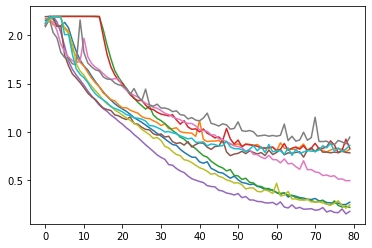

In [14]:
for i in range(k):
    plt.plot(model1.kfcv_histories[i][0])
    plt.plot(model1.kfcv_histories[i][1])

In [15]:
cv_probabilities, cv_predictions, cv_true, cv_comparisons, cv_df = [], [], [], [], []

In [16]:
for i in range(k):
    cv_probabilities.append(model1.kfcv_prob[i])
    cv_predictions.append(model1.kfcv_pred[i])
    cv_true.append(model1.kfcv_true[i])

In [17]:
for i in range(k):
    stack = np.vstack([cv_predictions[i], cv_true[i]]).T
    df = pd.DataFrame(stack)
    cv_comparisons.append(stack)
    cv_df.append(df)

### Accuracies

In [18]:
for df in cv_df:
    print(f'Accuracy: {sum(df[0] == df[1])/len(df)}')
    
print(f'Mean: {np.mean(df[0] == df[1])}')

Accuracy: 0.8176851186196981
Accuracy: 0.8177570093457944
Accuracy: 0.8498921639108555
Accuracy: 0.715744069015097
Accuracy: 0.7996405463695183
Mean: 0.7996405463695183


In [19]:
mean_f1 = pd.DataFrame()

### F1-Scores

<AxesSubplot:>

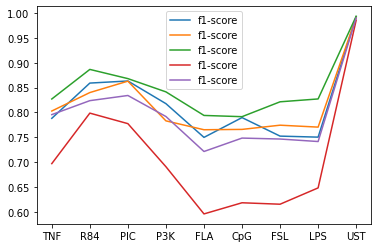

In [22]:
for df in cv_df:
    cr = sklearn.metrics.classification_report(df[0], df[1], target_names=ligands, output_dict=True)
    cr = pd.DataFrame(cr).transpose()
    cr = cr[:9]
    mean_f1 = pd.concat([mean_f1, cr], axis=1)
    
mean_f1.plot(y='f1-score')

<AxesSubplot:>

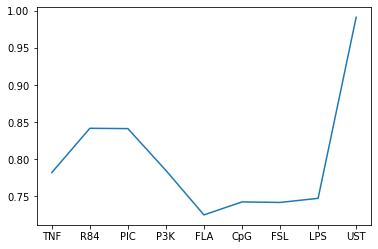

In [65]:
mean_f1.plot()

In [66]:
print(mean_f1)

TNF    0.782110
R84    0.841626
PIC    0.841191
P3K    0.784902
FLA    0.725151
CpG    0.742645
FSL    0.741913
LPS    0.747443
UST    0.990934
dtype: float64


### Confusion Fractions

In [27]:
fractions, cfs = [], []

In [28]:
for true, probabilities in zip(cv_true, cv_probabilities):
    fractions.append(Fraction(true, probabilities))

<AxesSubplot:>

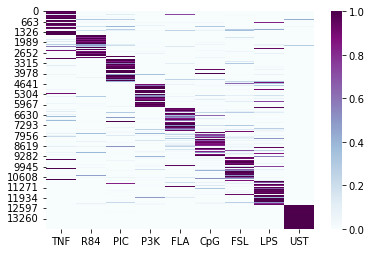

In [29]:
sns.heatmap(fractions[0], cmap='BuPu', xticklabels=ligands)

<AxesSubplot:>

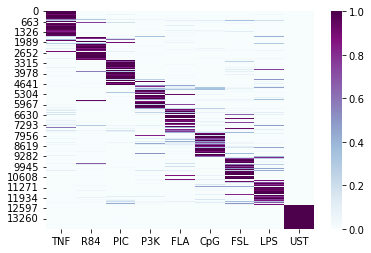

In [30]:
sns.heatmap(fractions[1], cmap='BuPu', xticklabels=ligands)

<AxesSubplot:>

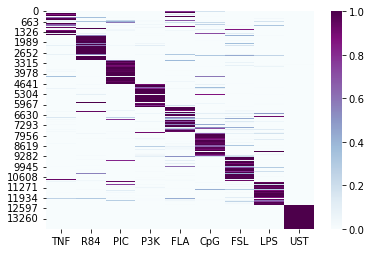

In [31]:
sns.heatmap(fractions[2], cmap='BuPu', xticklabels=ligands)

<AxesSubplot:>

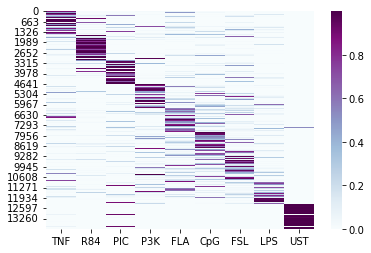

In [32]:
sns.heatmap(fractions[3], cmap='BuPu', xticklabels=ligands)

<AxesSubplot:>

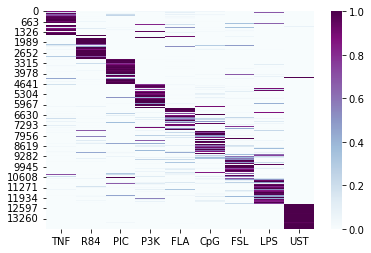

In [33]:
sns.heatmap(fractions[4], cmap='BuPu', xticklabels=ligands)

In [34]:
mean_fraction = np.mean(fractions, axis=0)

<AxesSubplot:>

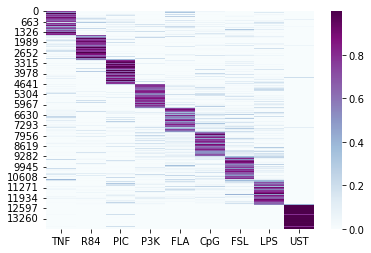

In [35]:
sns.heatmap(mean_fraction, cmap='BuPu', xticklabels=ligands)

## Polarization State Analysis

In [36]:
net = LSTM(input_size, hidden_sizes, output_size, num_layers=num_layers, device=device)
net.train()

LSTM(
  (lstm): LSTM(1, 98, num_layers=3, batch_first=True)
  (fc1): Linear(in_features=98, out_features=9, bias=True)
)

In [37]:
model = LSTMTrainer(model=net, device=device)

In [38]:
polarization_data, polar_dataloaders = [], []

In [39]:
for i in polarization:
    polarization_data.append(DatasetPolar(ligands, [i], replicas, size))
    
for data in polarization_data:
    _, dset = torch.utils.data.random_split(data, [11592-3200, 3200])
    load = torch.utils.data.DataLoader(dset, shuffle=True, batch_size=32)
    polar_dataloaders.append(load)

In [40]:
kfcv_p = []

In [42]:
for i in range(1, k+1):
    model.load(load_dir + 'omkfcv' + str(i) + '.pth')
    for data in polar_dataloaders:
        prob, pred, true = model.evaluate(data, batch_size=32, probability_size=9)
        kfcv_p.append([prob, pred, true])

* kfcv_p organized by unpolarized, ib, ig, i0, i3, i4 for all 5 models
* 6 x 5 = 30
* each list in kfcv_p should have a tuple (list) of probabilities, predictions, and labels

In [43]:
print(len(kfcv_p), len(kfcv_p[0]))

30 3


##### Grabbing averages across 5 models for simplicity

In [44]:
polarization_states = [[], [], [], [], [], []]

In [45]:
i = 0
for prob, pred, true in kfcv_p:
    if (i == 0 or i == 6 or i == 12 or i == 18 or i == 24):
        polarization_states[0].append([prob, pred, true])
        
    if (i == 1 or i == 7 or i == 13 or i == 19 or i == 25):
        polarization_states[1].append([prob, pred, true])
        
    if (i == 2 or i == 8 or i == 14 or i == 20 or i == 26):
        polarization_states[2].append([prob, pred, true])
        
    if (i == 3 or i == 9 or i == 15 or i == 21 or i == 27):
        polarization_states[3].append([prob, pred, true])
        
    if (i == 4 or i == 10 or i == 16 or i == 22 or i == 28):
        polarization_states[4].append([prob, pred, true])
        
    if (i == 5 or i == 11 or i == 17 or i == 23 or i == 29):
        polarization_states[5].append([prob, pred, true])
    i += 1

In [46]:
polarization_accuracies = []
polarization_f1 = []
polarization_fraction = []

In [47]:
fractions, dfs, f1s = [], [], []

In [48]:
for i in range(6):
    avgcf = pd.DataFrame()
    for prob, pred, true in polarization_states[i]:
        fraction = Fraction(true, prob)
        fractions.append(fraction)
        
        tab = np.vstack([pred, true]).T
        df = pd.DataFrame(tab)
        acc = sum(df[0] == df[1])/len(df)
        dfs.append(acc)
        
        cf = sklearn.metrics.classification_report(df[0], df[1], target_names=ligands, output_dict=True)
        cf = pd.DataFrame(cf).transpose()
        cf = cf[:9]
        avgcf = pd.concat([avgcf, cf], axis=1)
        
    polarization_fraction.append(np.mean(fractions, axis=0))
    polarization_accuracies.append(np.mean(dfs))
    polarization_f1.append(np.mean(avgcf['f1-score'].transpose()))

In [49]:
print(len(polarization_accuracies), len(polarization_f1), len(polarization_fraction))

6 6 6


##### Accuracies

In [50]:
newline = '\n'
print(f'Unpolarized: {polarization_accuracies[0]} {newline}ib: {polarization_accuracies[1]}{newline}ig: {polarization_accuracies[2]}{newline}i0: {polarization_accuracies[3]}{newline}i3: {polarization_accuracies[4]}{newline}i4: {polarization_accuracies[5]}')

Unpolarized: 0.8256250000000002 
ib: 0.8448437500000001
ig: 0.8295208333333335
i0: 0.840625
i3: 0.8506000000000001
i4: 0.8595625000000002


##### F1-Score

In [51]:
print(f'Unpolarized:{newline}{polarization_f1[0]} {newline}ib:{newline}{polarization_f1[1]}{newline}ig:{newline}{polarization_f1[2]}{newline}i0:{newline}{polarization_f1[3]}{newline}i3:{newline}{polarization_f1[4]}{newline}i4:{newline}{polarization_f1[5]}')    

Unpolarized:
TNF    0.832614
R84    0.837880
PIC    0.913697
P3K    0.797824
FLA    0.753954
CpG    0.753485
FSL    0.724806
LPS    0.806569
UST    0.995643
dtype: float64 
ib:
TNF    0.834555
R84    0.915660
PIC    0.858542
P3K    0.821119
FLA    0.858335
CpG    0.802760
FSL    0.841175
LPS    0.840761
UST    0.996265
dtype: float64
ig:
TNF    0.852171
R84    0.858642
PIC    0.869628
P3K    0.708701
FLA    0.704606
CpG    0.725306
FSL    0.731412
LPS    0.742122
UST    0.994726
dtype: float64
i0:
TNF    0.852984
R84    0.895228
PIC    0.901441
P3K    0.885908
FLA    0.779650
CpG    0.865120
FSL    0.875540
LPS    0.796993
UST    0.997693
dtype: float64
i3:
TNF    0.891707
R84    0.916029
PIC    0.929524
P3K    0.865950
FLA    0.857240
CpG    0.852102
FSL    0.842141
LPS    0.858100
UST    0.994878
dtype: float64
i4:
TNF    0.867515
R84    0.893259
PIC    0.889466
P3K    0.930566
FLA    0.896488
CpG    0.883765
FSL    0.894827
LPS    0.892220
UST    0.986464
dtype: float64


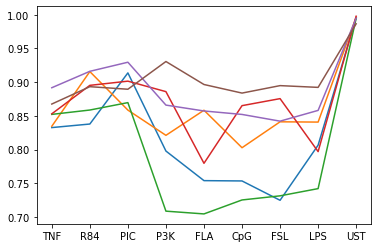

In [52]:
for f1 in polarization_f1:
    f1.plot()
    
# blue = unpolarized, orange = ib, green = ig, red = i0, purple = i3, brown = i4

##### Confusion Fractions

Unpolarized


<AxesSubplot:>

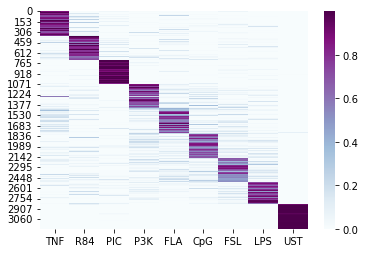

In [53]:
print('Unpolarized')
sns.heatmap(polarization_fraction[0], xticklabels=ligands, cmap='BuPu')

ib


<AxesSubplot:>

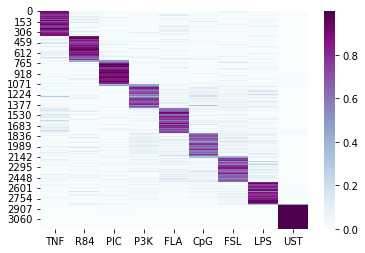

In [54]:
print('ib')
sns.heatmap(polarization_fraction[1], xticklabels=ligands, cmap='BuPu')

ig


<AxesSubplot:>

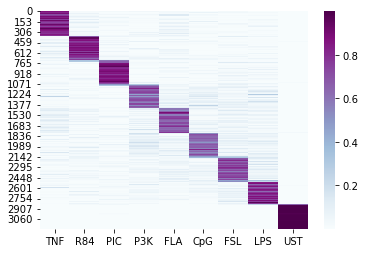

In [55]:
print('ig')
sns.heatmap(polarization_fraction[2], xticklabels=ligands, cmap='BuPu')

i0


<AxesSubplot:>

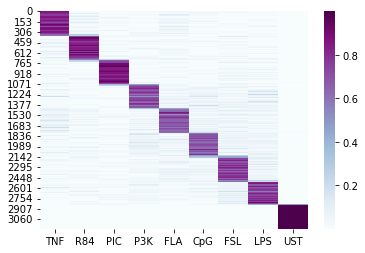

In [56]:
print('i0')
sns.heatmap(polarization_fraction[3], xticklabels=ligands, cmap='BuPu')

i3


<AxesSubplot:>

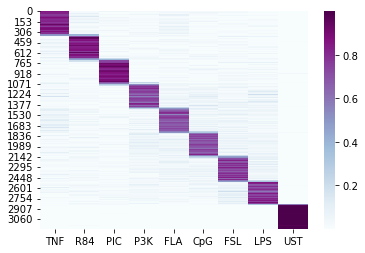

In [57]:
print('i3')
sns.heatmap(polarization_fraction[4], xticklabels=ligands, cmap='BuPu')

i4


<AxesSubplot:>

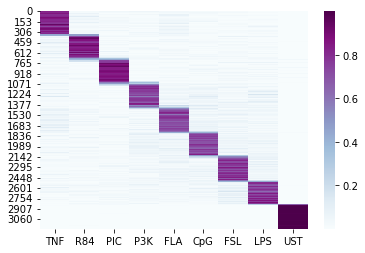

In [58]:
print('i4')
sns.heatmap(polarization_fraction[5], xticklabels=ligands, cmap='BuPu')

### Polarization States across x-axis

In [59]:
ps = pd.DataFrame(polarization_f1)
ps = ps.set_axis(['M0', 'IB', 'IG', 'I0', 'I3', 'I4'])

<AxesSubplot:>

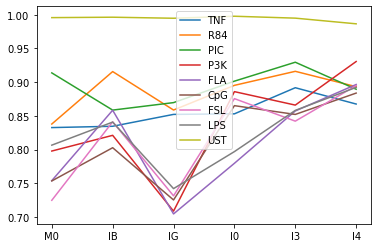

In [60]:
ps.plot()

In [61]:
ps_avg = np.mean(ps, axis=1)

<AxesSubplot:>

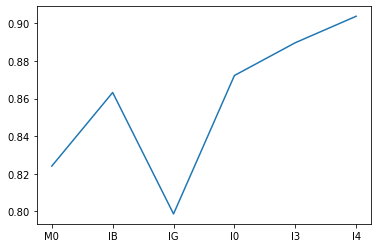

In [62]:
ps_avg.plot()